## MLP on V

Unfortunately, MLP still does not work wonder with few training. Feel like the dimenstionality of Q(s,a) is way too high. Perhaps we can just learn a V(s), and hand-craft a few features to represent s. We can provide the board with all possible next states for all action in the current state. The agent does not have to learn the effect of its action. It knows the effect of the action (i.e., the transition), we just evaluate outcomes.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from TetrisGym import TetrisGym
from value_dqn import ValueDQNAgent

In [8]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 10
BOARD_HEIGHT = 20

# bellman update settings
ALPHA = 0.0001  # learning rate
GAMMA = 0.99  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.1  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 5_000 # 1_000_000
MAX_STEPS = 2_000

# Batch parameters
MEMORY_SIZE= 30_000  # size of memory to sample batches from
BATCH_SIZE = 64  # mini-batch size for replay(), used to perform a training update

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_PATH = "value_dqn_checkpoints/latest.pth"

Using: cpu


In [10]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = ValueDQNAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE,
    device=DEVICE
)

agent.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)

Value-DQN | mu_100=248.7 | epsilon=0.10: 100%|██████████| 5000/5000 [09:51<00:00,  8.45it/s]


In [11]:
agent.save_agent(SAVE_PATH)

In [12]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 10
BOARD_HEIGHT = 20

# bellman update settings
ALPHA = 0.0001  # learning rate
GAMMA = 0.99  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.1  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 5_000 # 1_000_000
MAX_STEPS = 2_000

# Batch parameters
MEMORY_SIZE= 30_000  # size of memory to sample batches from
BATCH_SIZE = 64  # mini-batch size for replay(), used to perform a training update

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_PATH = "value_dqn_checkpoints/latest.pth"
LOAD_PATH = "value_dqn_checkpoints/latest.pth"

Using: cpu


In [13]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = ValueDQNAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE,
    device=DEVICE
)
agent.load_agent(LOAD_PATH)


In [14]:
agent.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)

Value-DQN | mu_100=262.8 | epsilon=0.10: 100%|██████████| 5000/5000 [14:07<00:00,  5.90it/s]


In [15]:
agent.save_agent(SAVE_PATH)

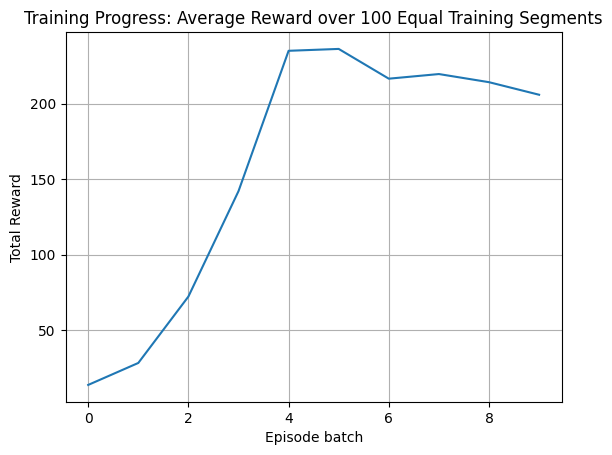

In [16]:
plt.plot(np.mean(np.array_split(agent.rewards, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

In [17]:
agent.save_gif("value_dqn_checkpoints/ep_10000.gif")

Saved gameplay GIF to: value_dqn_checkpoints/ep_10000.gif


# with 50_000 episodes

In [18]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 10
BOARD_HEIGHT = 20

# bellman update settings
ALPHA = 0.0001  # learning rate
GAMMA = 0.99  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.1  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 25_000 # 1_000_000
MAX_STEPS = 2_000

# Batch parameters
MEMORY_SIZE= 30_000  # size of memory to sample batches from
BATCH_SIZE = 64  # mini-batch size for replay(), used to perform a training update

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_PATH = "value_dqn_checkpoints/latest_5_0000.pth"

Using: cpu


In [19]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = ValueDQNAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE,
    device=DEVICE
)

agent.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)
agent.save_agent(SAVE_PATH)

Value-DQN | mu_100=157.4 | epsilon=0.10: 100%|██████████| 25000/25000 [1:02:03<00:00,  6.71it/s]


In [20]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 10
BOARD_HEIGHT = 20

# bellman update settings
ALPHA = 0.0001  # learning rate
GAMMA = 0.99  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.1  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 25_000 # 1_000_000
MAX_STEPS = 2_000

# Batch parameters
MEMORY_SIZE= 30_000  # size of memory to sample batches from
BATCH_SIZE = 64  # mini-batch size for replay(), used to perform a training update

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_PATH = "value_dqn_checkpoints/latest_5_0000.pth"
LOAD_PATH = "value_dqn_checkpoints/latest_5_0000.pth"

Using: cpu


In [21]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent = ValueDQNAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE,
    device=DEVICE
)
agent.load_agent(LOAD_PATH)
agent.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)

Value-DQN | mu_100=195.5 | epsilon=0.10: 100%|██████████| 25000/25000 [1:29:40<00:00,  4.65it/s]    


In [22]:
agent.save_agent(SAVE_PATH)

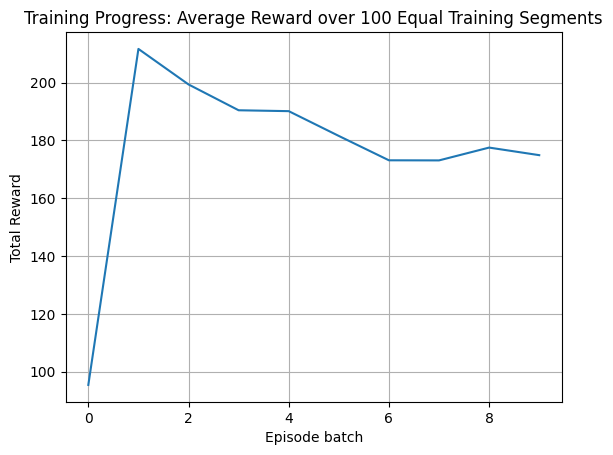

In [23]:
plt.plot(np.mean(np.array_split(agent.rewards, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

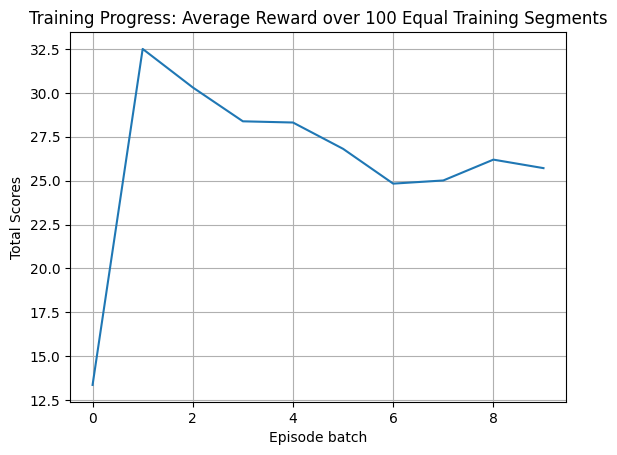

In [25]:
plt.plot(np.mean(np.array_split(agent.scores, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Scores')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

In [24]:
agent.save_gif("value_dqn_checkpoints/ep_50000.gif")

Saved gameplay GIF to: value_dqn_checkpoints/ep_50000.gif


## With 10_000 episode but alpha = 0.01 and gamma = 0.995， batch 128

In [36]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 10
BOARD_HEIGHT = 20

# bellman update settings
ALPHA = 0.001  # learning rate
GAMMA = 0.995  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.1  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 5_000 # 1_000_000
MAX_STEPS = 2_000

# Batch parameters
MEMORY_SIZE= 30_000  # size of memory to sample batches from
BATCH_SIZE = 128  # mini-batch size for replay(), used to perform a training update

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_PATH = "value_dqn_checkpoints/latest_5_0000_alpha0.01_gamma0.995.pth"

Using: cpu


In [38]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent2 = ValueDQNAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE,
    device=DEVICE
)

agent2.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)
agent2.save_agent(SAVE_PATH)

Value-DQN | mu_100=281.9 | epsilon=0.10: 100%|██████████| 5000/5000 [10:26<00:00,  7.99it/s]


In [39]:
""" Hyper‑parameters """
# board settings
BOARD_WIDTH = 10
BOARD_HEIGHT = 20

# bellman update settings
ALPHA = 0.01  # learning rate
GAMMA = 0.995  # discount factor

# epsilon-greedy settings
EPSILON = 1.0  # exploration rate (starting value)
EPSILON_MIN = 0.1  # minimum epsilon
EPSILON_DECAY = 0.9995

NUM_EPISODES = 5_000 # 1_000_000
MAX_STEPS = 2_000

# Batch parameters
MEMORY_SIZE= 30_000  # size of memory to sample batches from
BATCH_SIZE = 64  # mini-batch size for replay(), used to perform a training update

# Train on CPU OR GPU?
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", DEVICE)

# Saving logistics
SAVE_PATH = "value_dqn_checkpoints/latest_5_0000_alpha0.01_gamma0.995.pth"
LOAD_PATH = "value_dqn_checkpoints/latest_5_0000_alpha0.01_gamma0.995.pth"

Using: cpu


In [40]:
env = TetrisGym(width=BOARD_WIDTH, height=BOARD_HEIGHT, max_steps=MAX_STEPS)
agent2 = ValueDQNAgent(
    board_width=BOARD_WIDTH, board_height=BOARD_HEIGHT,
    alpha=ALPHA, gamma=GAMMA,
    eps_start=EPSILON, eps_min=EPSILON_MIN, eps_decay=EPSILON_DECAY,
    memory_size=MEMORY_SIZE, batch_size=BATCH_SIZE,
    device=DEVICE
)
agent2.load_agent(LOAD_PATH)
agent2.train(env, episodes=NUM_EPISODES, max_steps=MAX_STEPS)

Value-DQN | mu_100=310.3 | epsilon=0.10: 100%|██████████| 5000/5000 [26:05<00:00,  3.19it/s]   


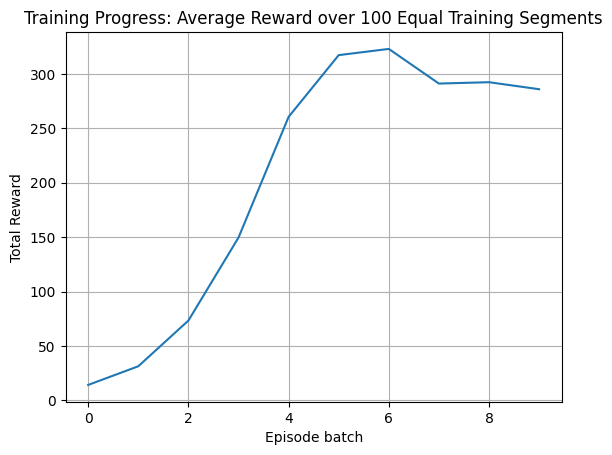

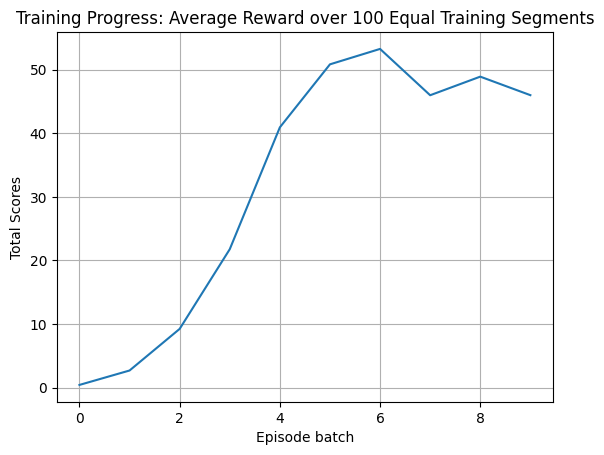

In [41]:
agent2.save_agent(SAVE_PATH)
plt.plot(np.mean(np.array_split(agent2.rewards, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Reward')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

plt.plot(np.mean(np.array_split(agent2.scores, 10),axis=1))
plt.xlabel('Episode batch')
plt.ylabel('Total Scores')
plt.title('Training Progress: Average Reward over 100 Equal Training Segments')
plt.grid(True)
plt.show()

In [42]:
agent2.save_gif("value_dqn_checkpoints/ep_10000_batch128.gif")

Saved gameplay GIF to: value_dqn_checkpoints/ep_10000_batch128.gif
